## 2. Finding the Optimal S

In [11]:
import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [6]:
from utilities.data_organizer import DataOrganizer

DO = DataOrganizer(batch_count=100)
data = DO.merge_all_batches(data_range_folder="10p0-10p2", data_type="ID")
data_essentials = data[["length", "array"]].copy()

In [8]:
import os
from tqdm import tqdm
from time_complexity_analysis.hybrid_sort_tc_analysis import HybridSortTCA

search_range = list(range(22, 27)) + list(range(45, 56))
base_path = os.path.join("data_storage", "hybrid_sort_analysis")

if not os.path.exists(base_path):
    os.makedirs(base_path)

for S in tqdm(search_range):
    HSTCA = HybridSortTCA(S=S)
    analysis = HSTCA.hybrid_sort_time_complexity_analysis(data_essentials)

    save_path = os.path.join(base_path, f"S-{S}.csv")

    analysis.to_csv(save_path, index=False)

100%|██████████| 16/16 [01:40<00:00,  6.31s/it]


In [12]:
import pandas as pd

base_path = os.path.join("data_storage", "hybrid_sort_analysis")
data_path = os.path.join(base_path, f"S-{search_range[0]}.csv")
data = pd.read_csv(data_path)
data_essentials = data[["length", "hybrid_sort_key_comparison", 
                        "hybrid_sort_time"]].copy()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def avg_plot(insertion_sort: pd.DataFrame, merge_sort: pd.DataFrame,
                    hybrid_sort: pd.DataFrame) -> None:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))

    # ax1: sort time
    sns.lineplot(x="length", y="insertion_sort_time", data=insertion_sort, 
                label="Insertion Sort", palette="blue", ax=ax1)

    sns.lineplot(x="length", y="merge_sort_time", data=merge_sort, 
                label="Merge Sort", palette="orange", ax=ax1)
    
    sns.lineplot(x="length", y="hybrid_sort_time", data=hybrid_sort,
                label="Hybrid Sort", palette="green", ax=ax1)

    ax1.set_title("Sort Time: Insertion Sort vs. Merge Sort")

    # ax2: key comparison
    sns.lineplot(x="length", y="insertion_sort_key_comparison", data=insertion_sort, 
                label="Insertion Sort", palette="blue", ax=ax2)

    sns.lineplot(x="length", y="merge_sort_key_comparison", data=merge_sort, 
                label="Merge Sort", palette="orange", ax=ax2)
    
    sns.lineplot(x="length", y="hybrid_sort_key_comparison", data=hybrid_sort,
                label="Hybrid Sort", palette="green", ax=ax2)

    ax2.set_title("Key Comparison: Insertion Sort vs. Merge Sort")

    plt.tight_layout()
    plt.legend()
    plt.show()

In [18]:
insertion_sort_p0p2, merge_sort_p0p2 = DO.merge_all_batches("10p0-10p2", "TC", split=True)

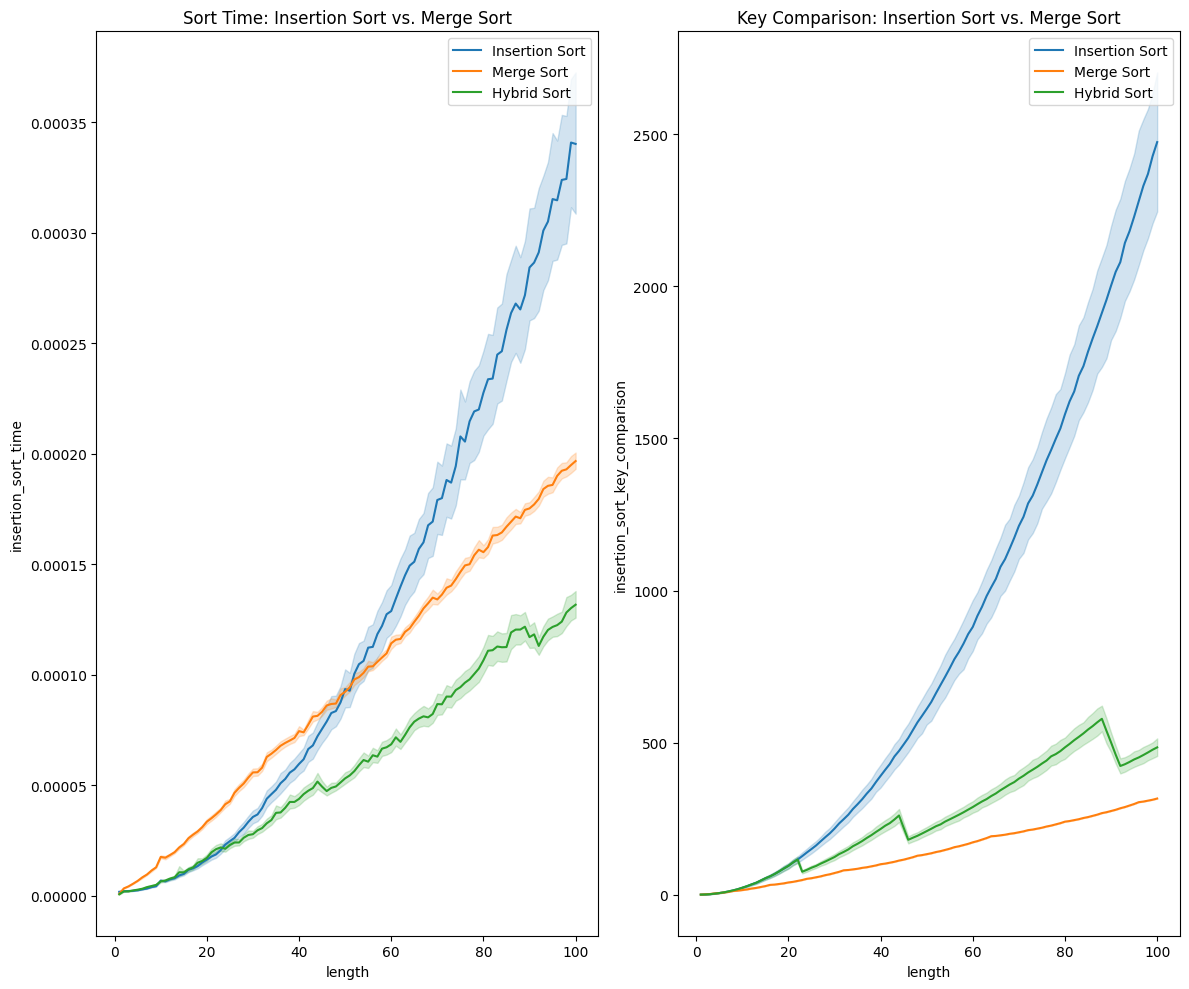

In [19]:
avg_plot(insertion_sort_p0p2, merge_sort_p0p2, data_essentials)

In [40]:
from sklearn.linear_model import LinearRegression

def get_average() -> pd.DataFrame:

    avg_data = []
    base_path = os.path.join("data_storage", "hybrid_sort_analysis")

    for i in tqdm(search_range):
        data_path = os.path.join(base_path, f"S-{i}.csv")
        data = pd.read_csv(data_path)

        model = LinearRegression()
        model.fit(data[["length"]], data["hybrid_sort_time"])  # Using DataFrame for linear regression input

        score = model.score(data[["length"]], data["hybrid_sort_time"])

        avg_data.append({
            "S": i,
            "score": score,
            "mean_sort_time": data["hybrid_sort_time"].mean(),
            "sort_time_variance": data["hybrid_sort_time"].var(),
            "mean_key_comparison": data["hybrid_sort_key_comparison"].mean()
        })

    return pd.DataFrame(avg_data)

In [41]:
avg_data = get_average()

100%|██████████| 16/16 [00:03<00:00,  4.67it/s]


In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def avg_plot(avg_data: pd.DataFrame) -> None:

    title1 = "S vs Score"
    title2 = "S vs Mean Key Comparison"
    title3 = "S vs Mean Sort Time"
    title4 = "S vs Sort Time Variance"
    
    # Create subplots: 2 row, 2 columns
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles=(
                            title1, title2, 
                            title3, title4))

    # S vs Score
    fig.add_trace(go.Scatter(
        x=avg_data['S'], y=avg_data['score'], 
        mode='lines', name=title1), 
        row=1, col=1)
    
    # S vs Mean Key Comparison
    fig.add_trace(go.Scatter(
        x=avg_data['S'], y=avg_data['mean_key_comparison'], 
        mode='lines', name=title2), 
        row=1, col=2)
    
    # S vs Mean Sort Time
    fig.add_trace(go.Scatter(
        x=avg_data['S'], y=avg_data['mean_sort_time'], 
        mode='lines', name=title3), 
        row=2, col=1)
    
    # S vs Mean Sort Time Variance
    fig.add_trace(go.Scatter(
        x=avg_data['S'], y=avg_data["sort_time_variance"], 
        mode='lines', name=title4),
        row=2, col=2)

    # Update layout for a clearer view
    fig.update_layout(
        title_text="Hybrid Sort Analysis",
        # margin=dict(l=10, r=10, b=10, t=30),
        font=dict(size=10),
        height=800,
    )
    
    fig.show()

In [58]:
avg_plot(avg_data)

In [56]:
S = int(avg_data.loc[avg_data["mean_sort_time"].idxmin()]["S"])
print(f"Optimal S: {S}")

Optimal S: 23
